In [2]:
import itertools
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy import interp
import matplotlib.pyplot as plt
import dataset_utils
import os

In [3]:
def plot_roc(clf, genes, title='Receiver Operating Characteristic'):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i in range(5):
        train, test = train_sets[i], test_sets[i]
        X, y = train[genes], train['responses'].astype(int)
        X_test, y_test = test[genes], test['responses'].astype(int)

        probas_ = clf.fit(X, y).predict_proba(X_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
    return dataset_utils.plot_roc(tprs, aucs, title)

In [4]:
train_sets, test_sets = dataset_utils.kfold_train_test_sets('../t_rnaseq_scaled_symbols.csv')
pathways = sorted(os.listdir('gene_sets'))

## Random Forest Metrics

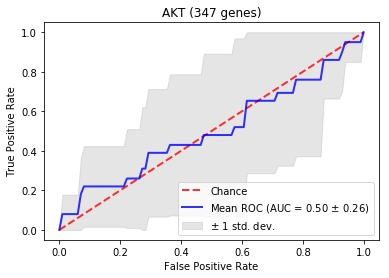

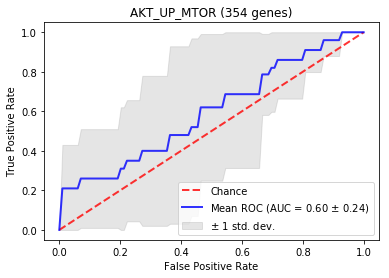

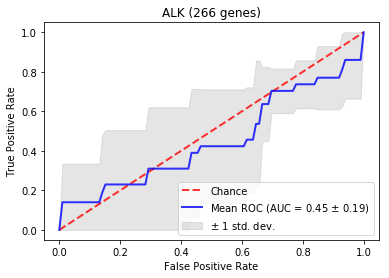

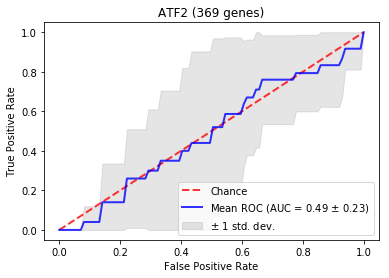

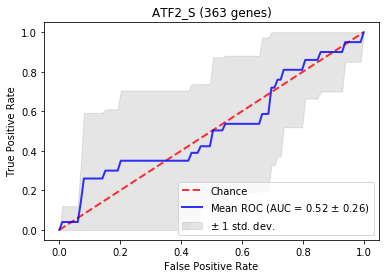

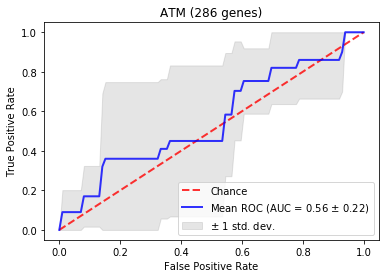

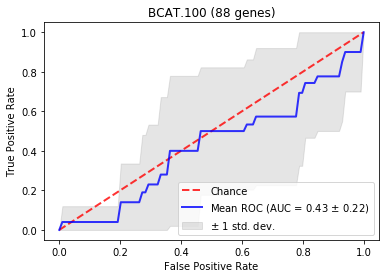

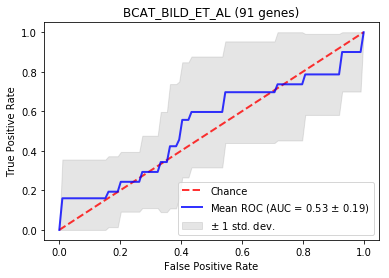

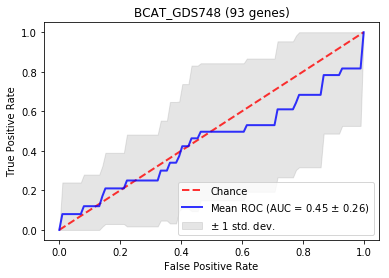

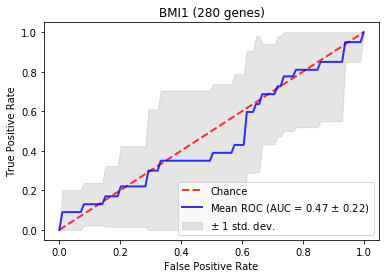

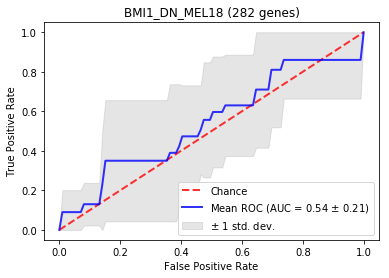

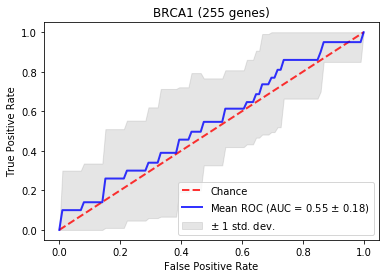

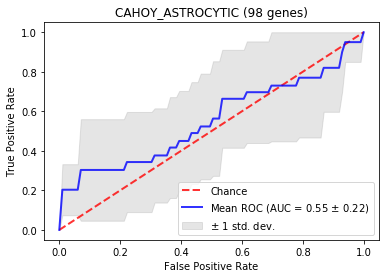

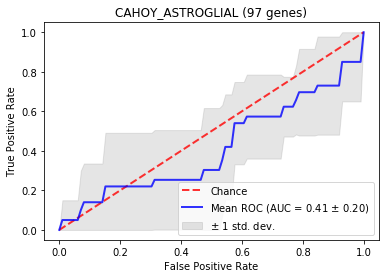

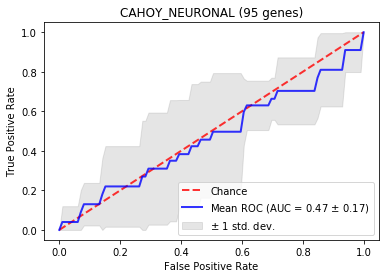

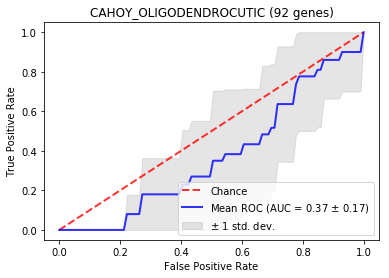

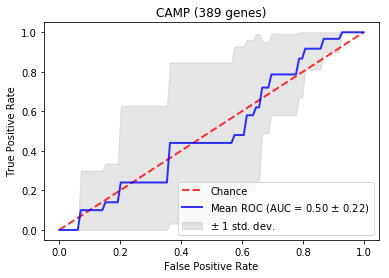

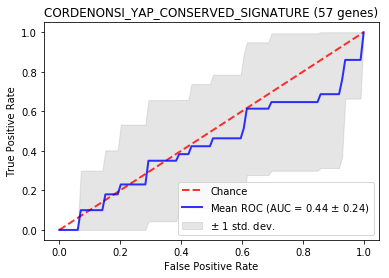

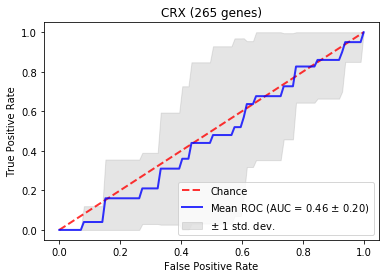

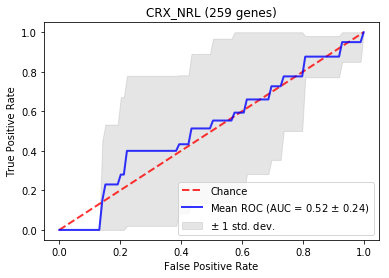

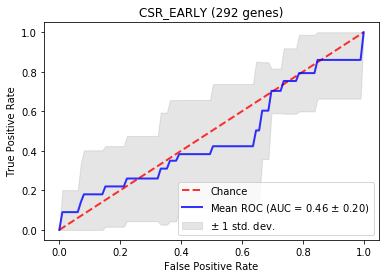

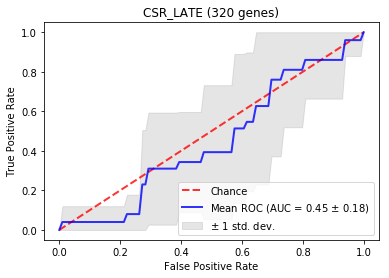

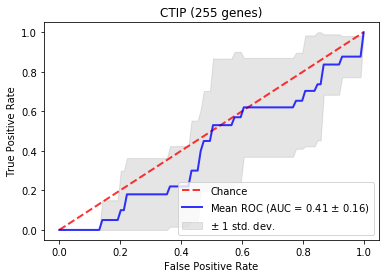

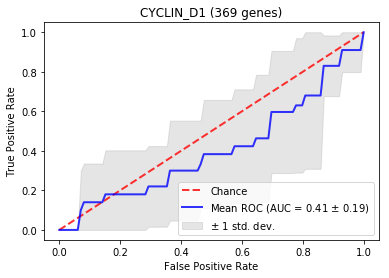

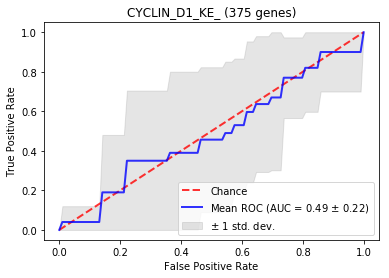

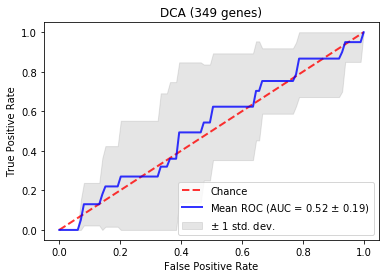

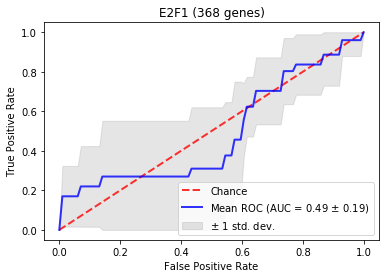

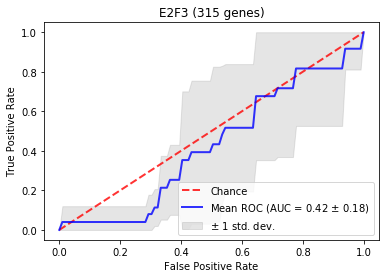

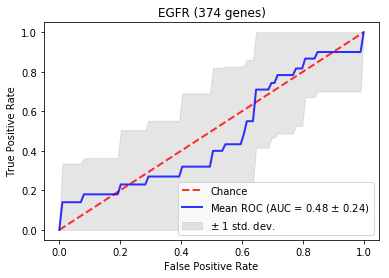

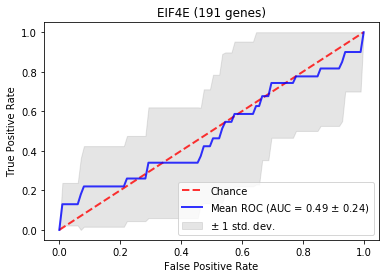

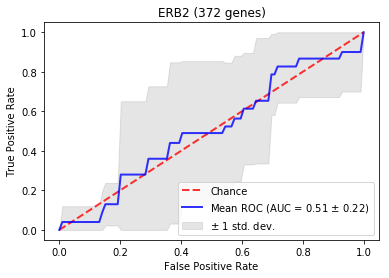

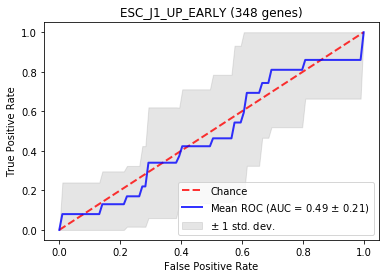

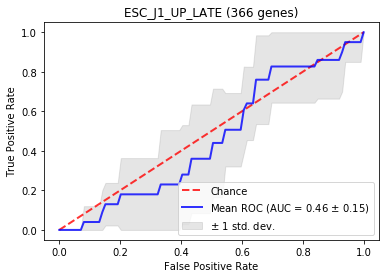

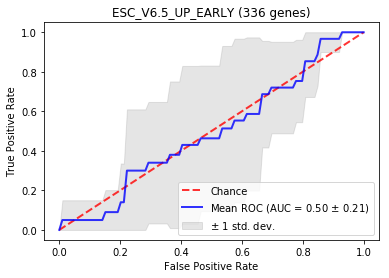

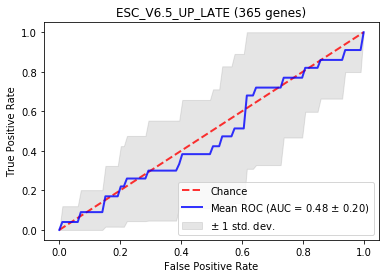

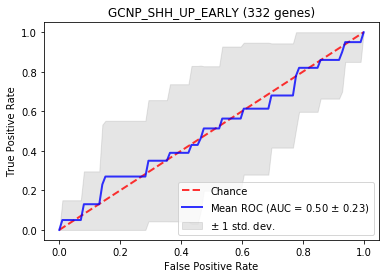

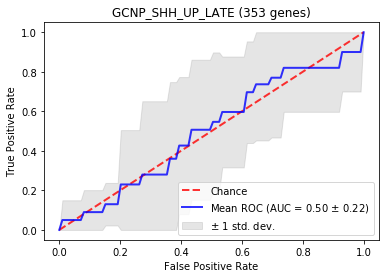

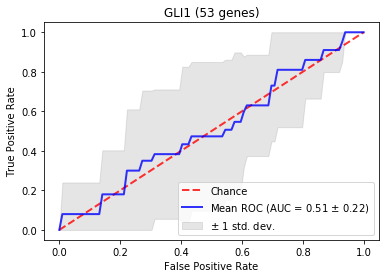

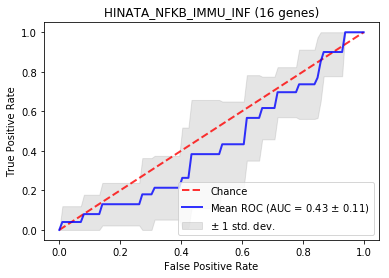

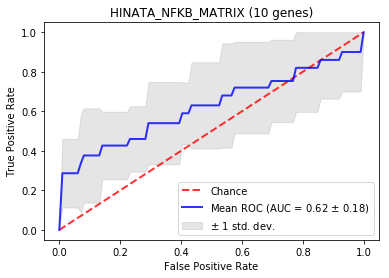

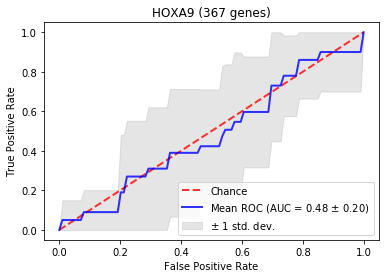

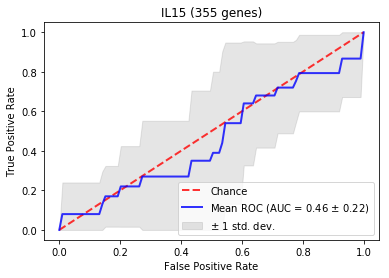

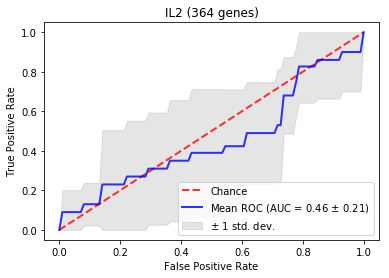

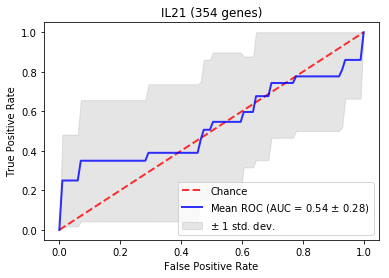

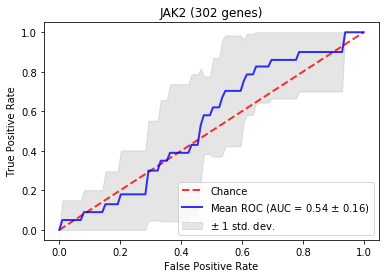

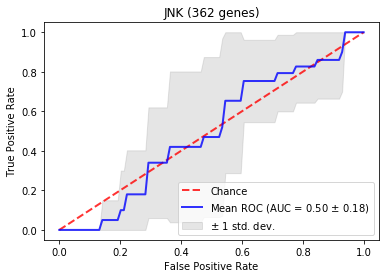

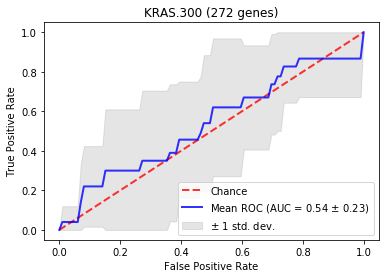

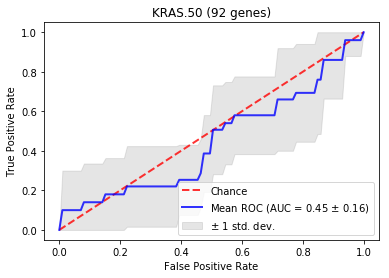

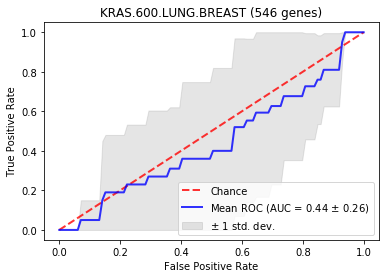

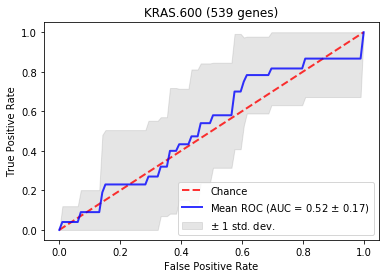

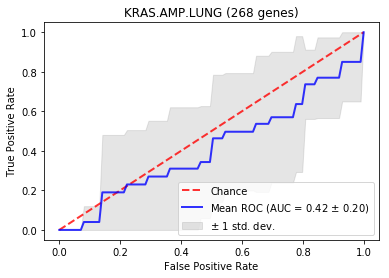

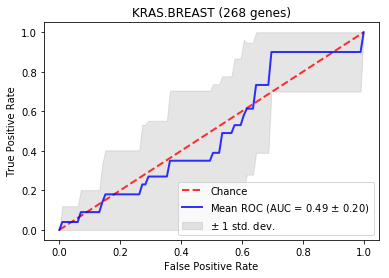

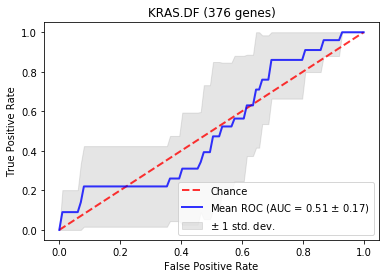

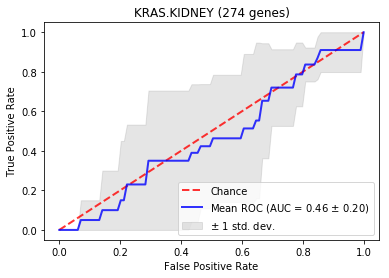

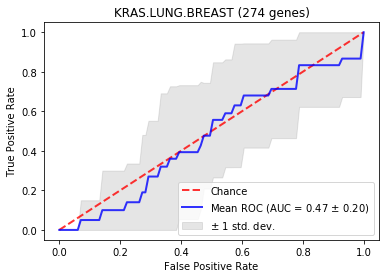

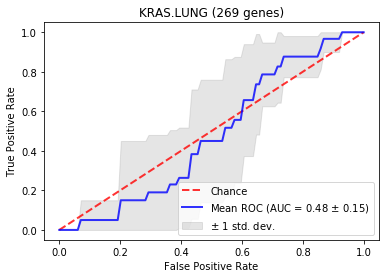

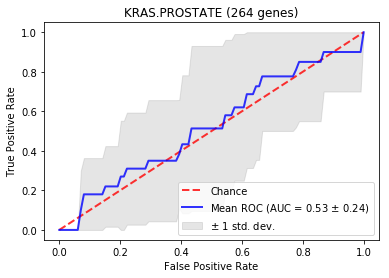

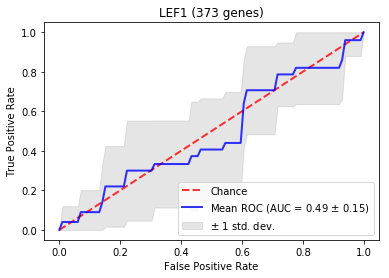

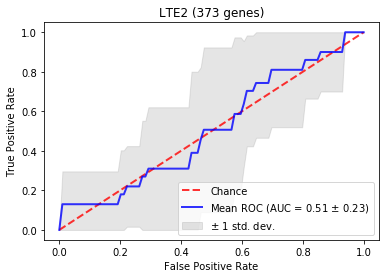

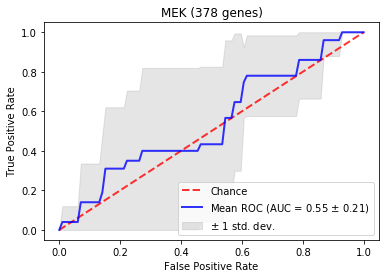

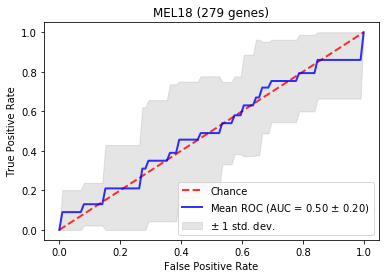

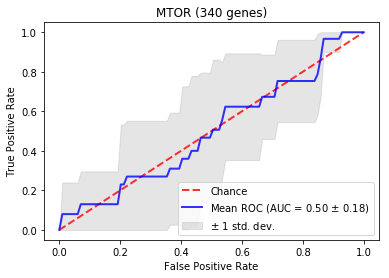

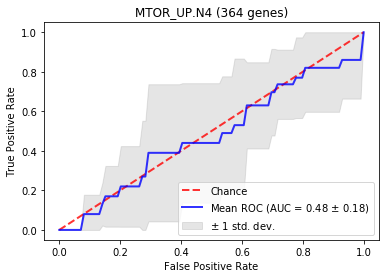

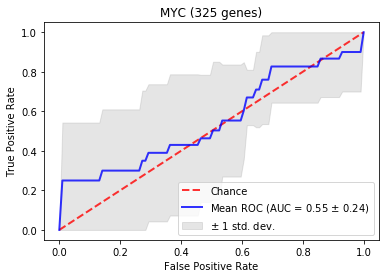

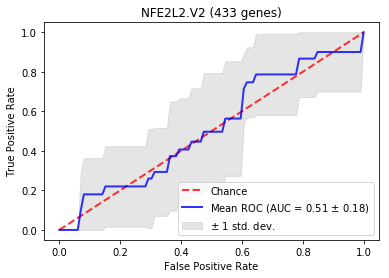

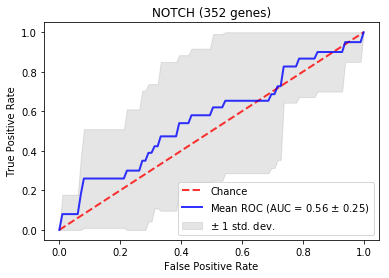

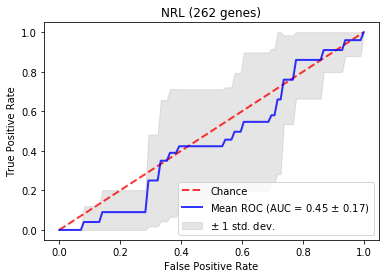

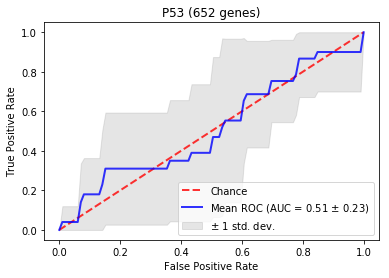

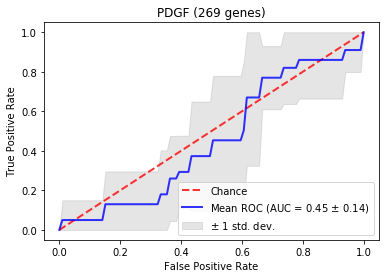

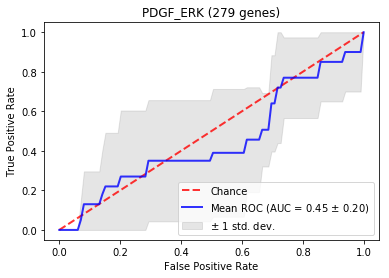

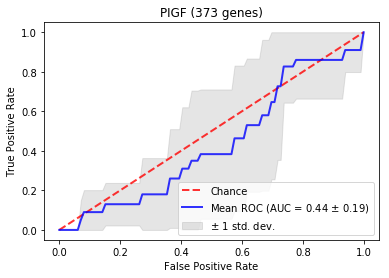

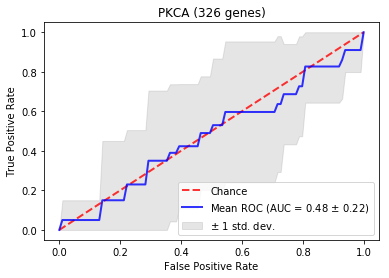

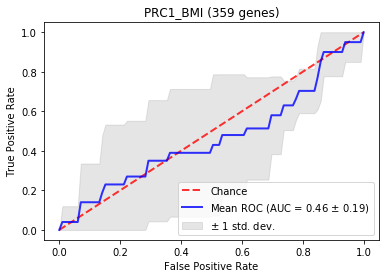

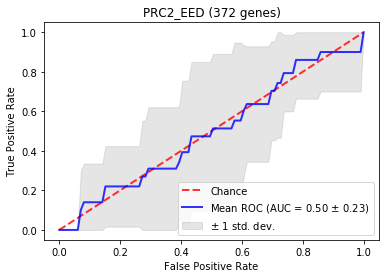

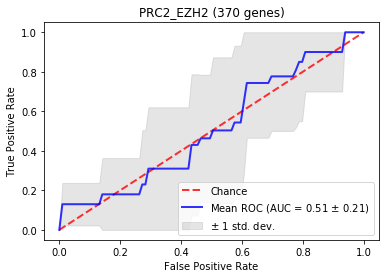

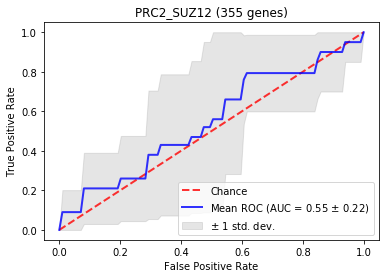

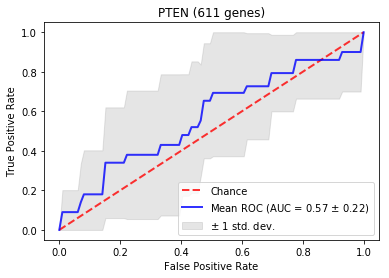

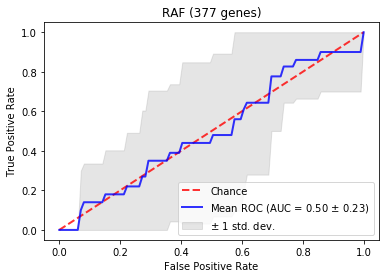

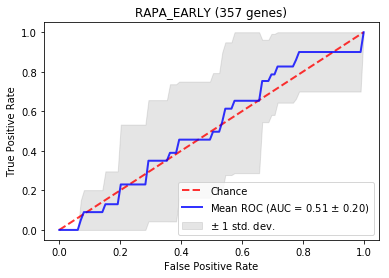

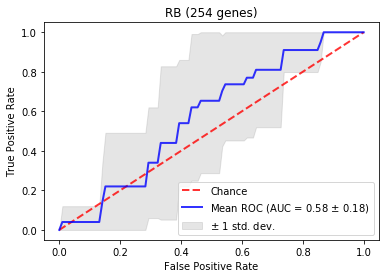

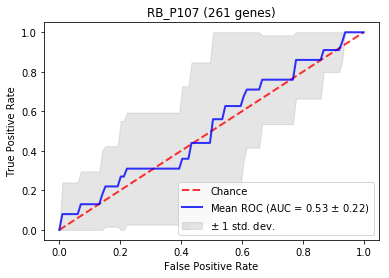

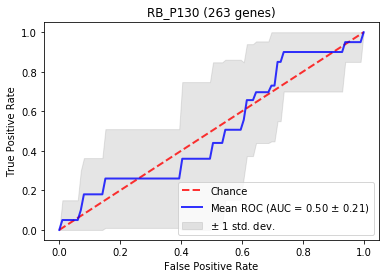

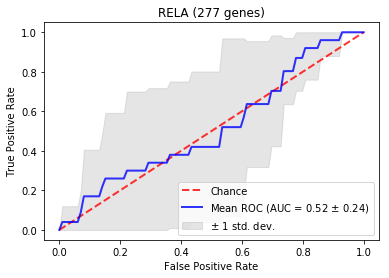

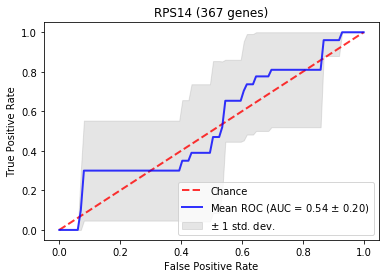

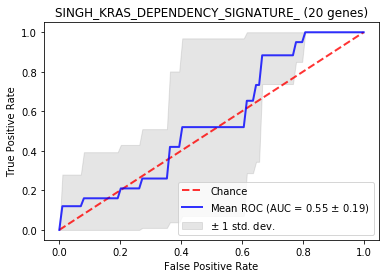

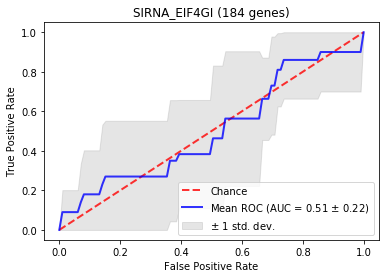

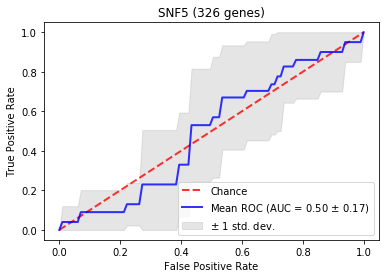

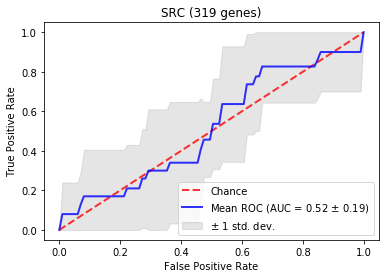

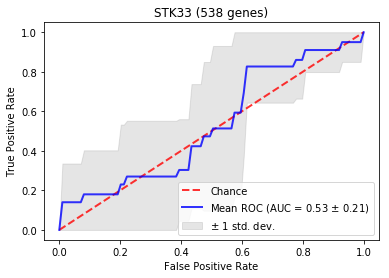

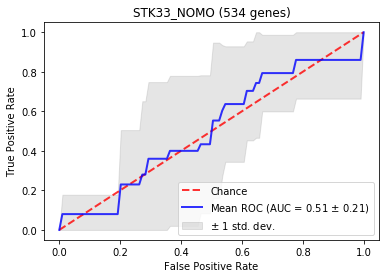

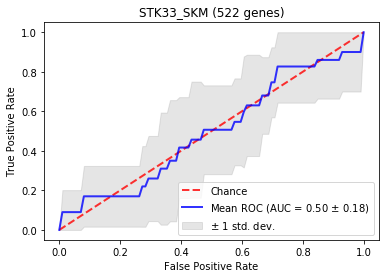

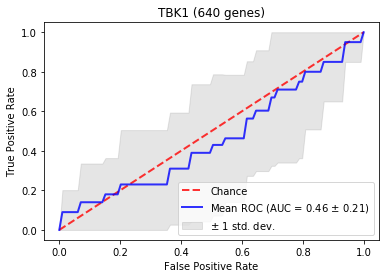

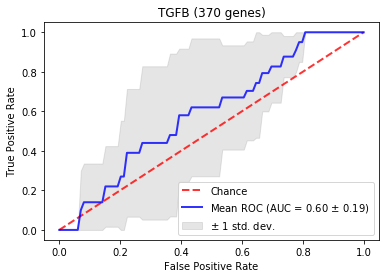

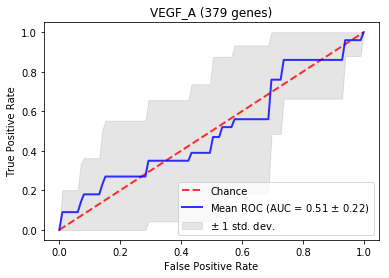

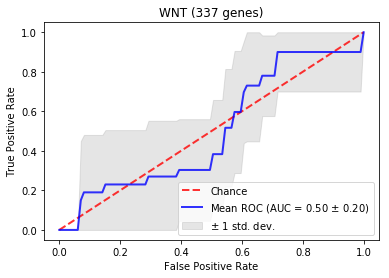

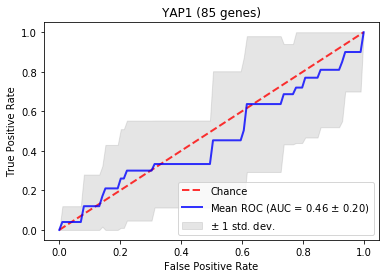

In [5]:
rf_perf = []
for p in pathways:
    clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=7)
    genes = dataset_utils.get_genes(p)
    name = "{} ({} genes)".format('.'.join(p.split('.')[:-1]), len(genes))
    mean_auc = plot_roc(clf, genes, name)
    rf_perf.append((name, mean_auc))

In [6]:
# get top 10 gene sets (by AUROC)
rf_perf.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    print("{}\t{}".format(rf_perf[i][1], rf_perf[i][0]))

0.6231649831649833	HINATA_NFKB_MATRIX (10 genes)
0.5978787878787879	AKT_UP_MTOR (354 genes)
0.5964646464646464	TGFB (370 genes)
0.5774074074074074	RB (254 genes)
0.5708080808080808	PTEN (611 genes)
0.5649158249158248	NOTCH (352 genes)
0.5579797979797979	ATM (286 genes)
0.5522895622895623	CAHOY_ASTROCYTIC (98 genes)
0.5521548821548821	SINGH_KRAS_DEPENDENCY_SIGNATURE_ (20 genes)
0.5507407407407406	MYC (325 genes)


# Metrics for SVM 

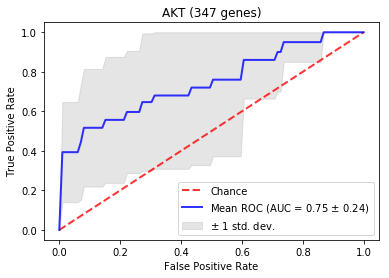

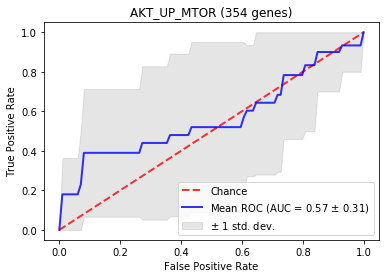

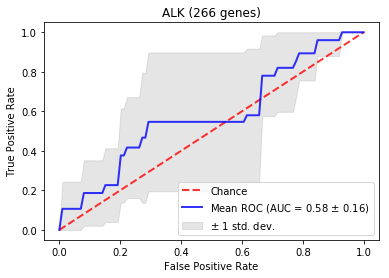

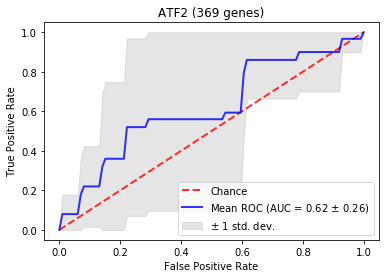

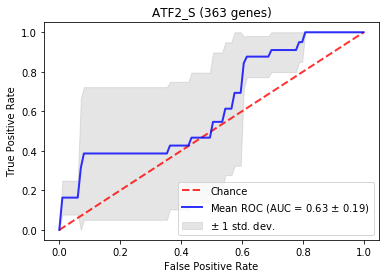

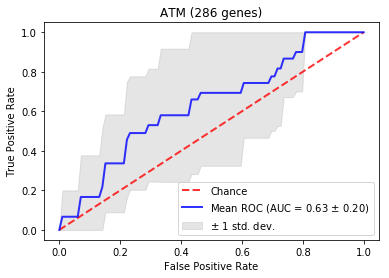

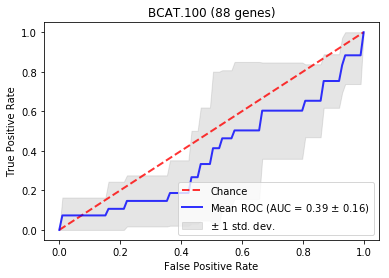

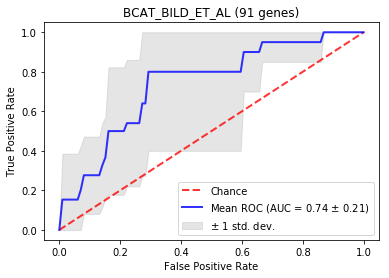

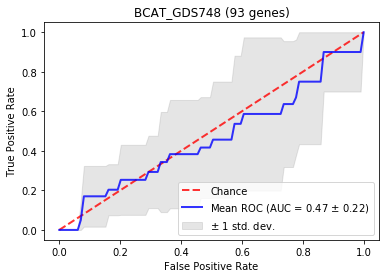

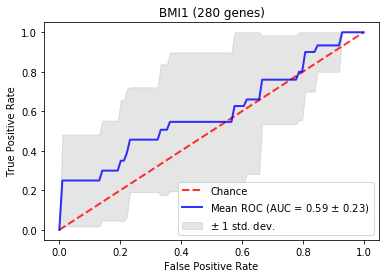

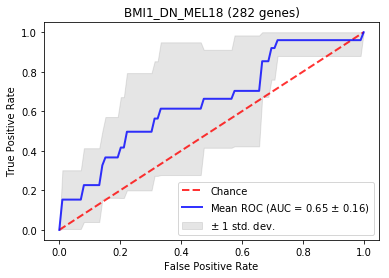

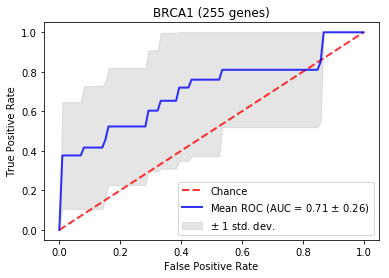

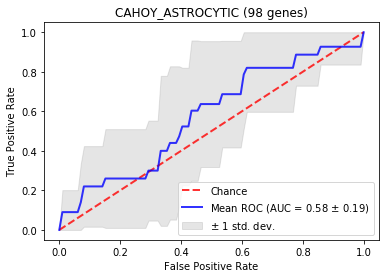

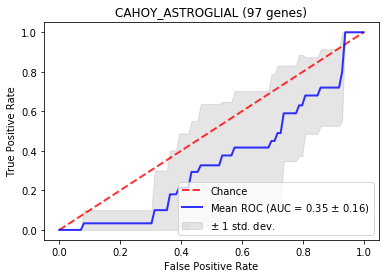

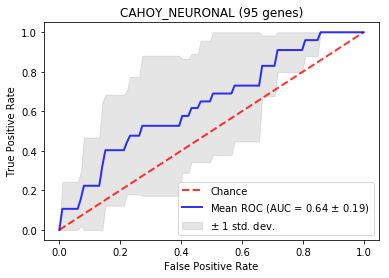

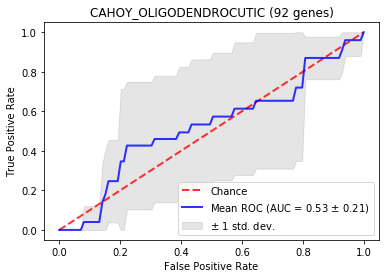

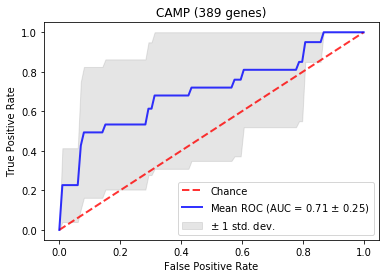

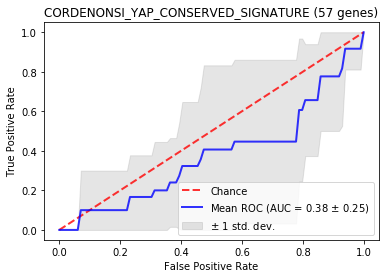

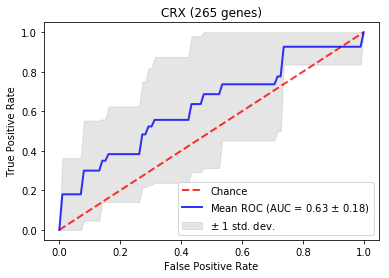

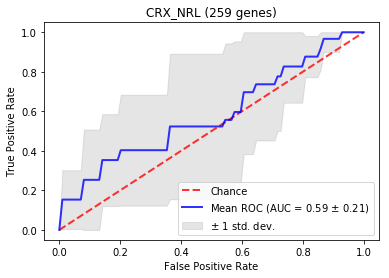

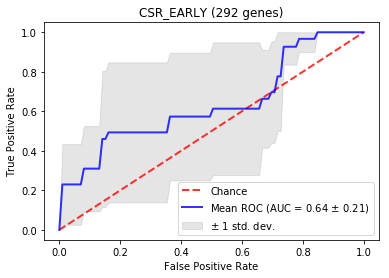

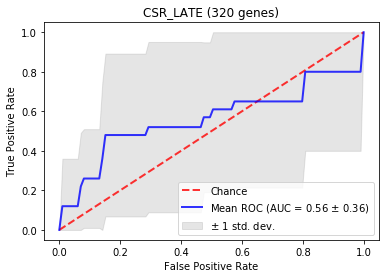

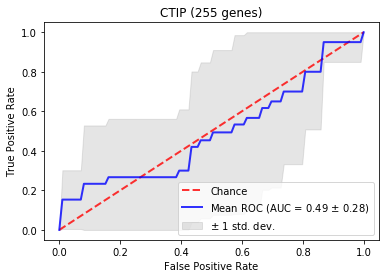

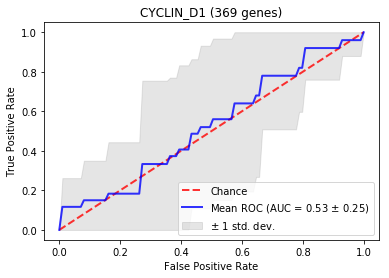

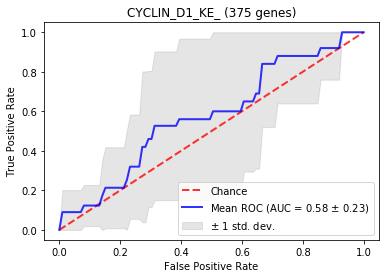

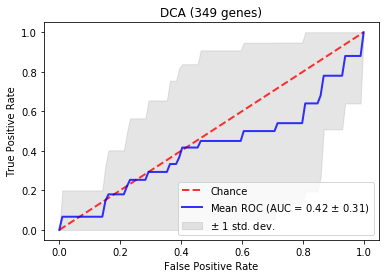

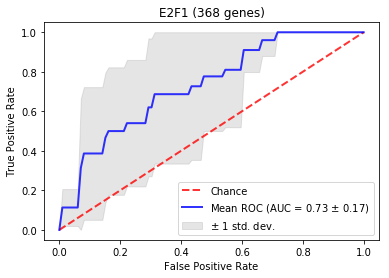

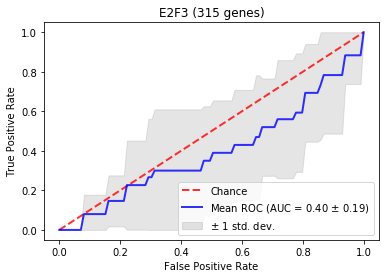

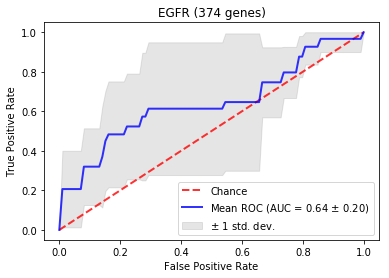

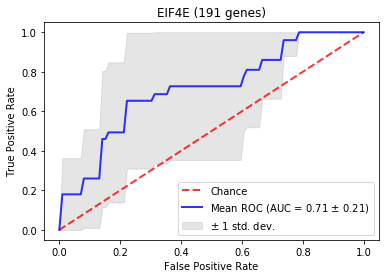

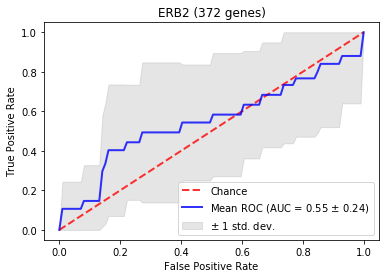

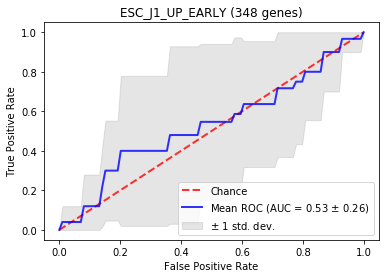

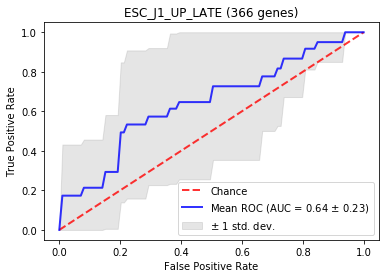

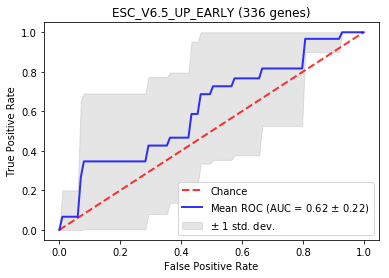

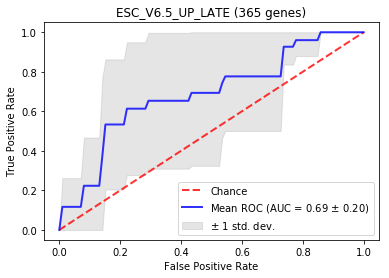

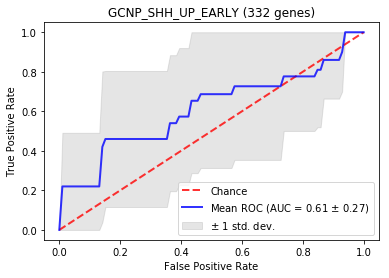

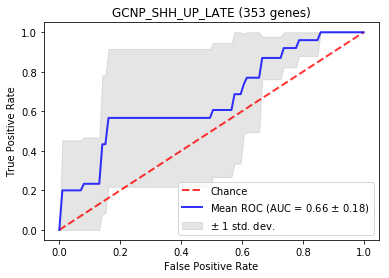

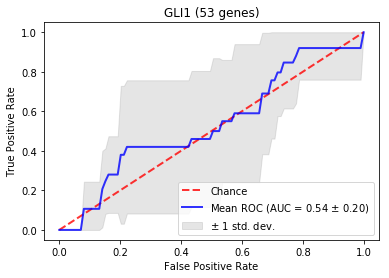

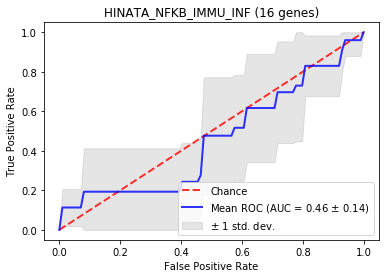

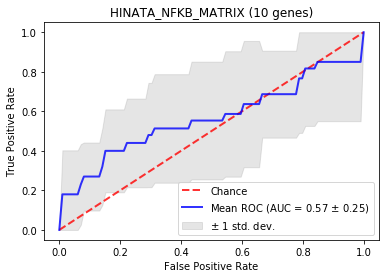

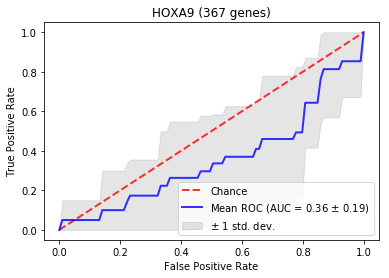

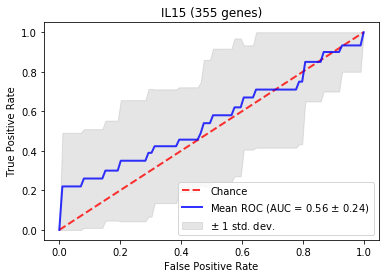

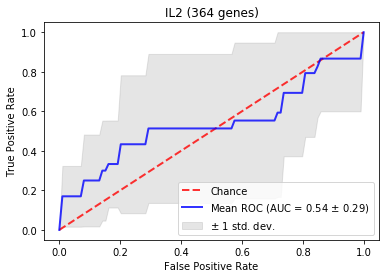

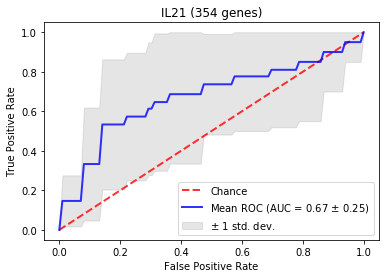

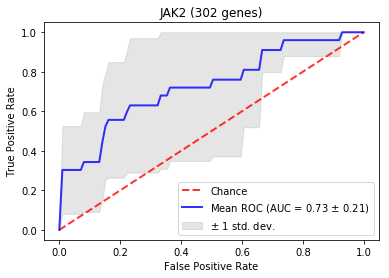

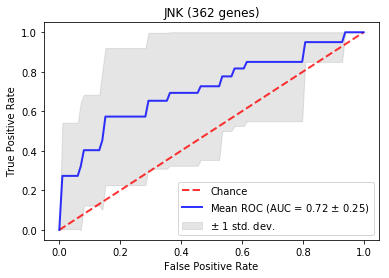

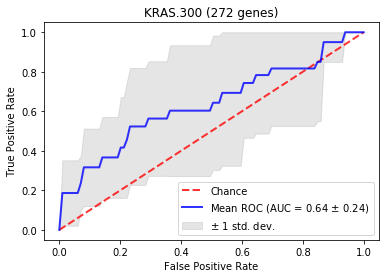

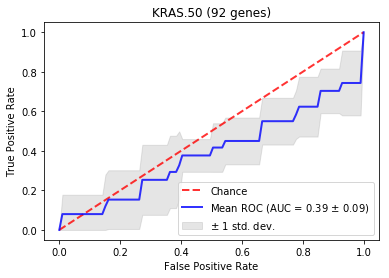

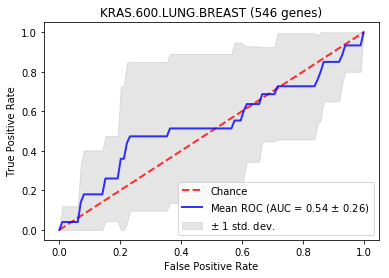

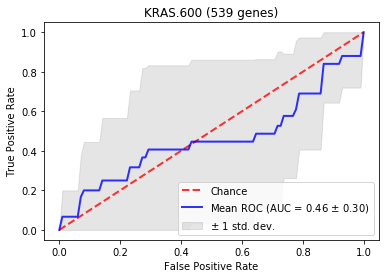

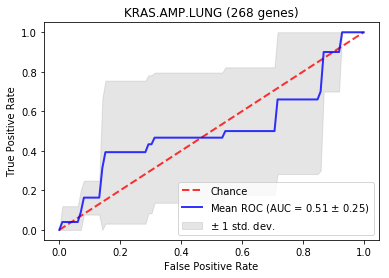

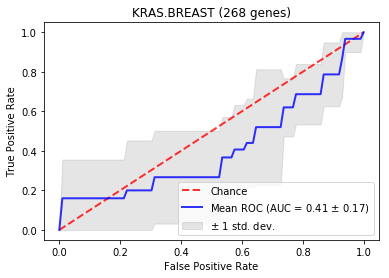

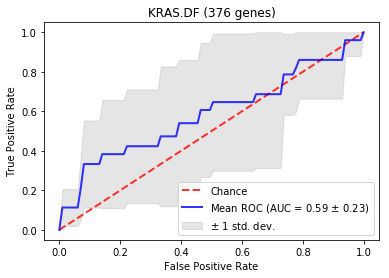

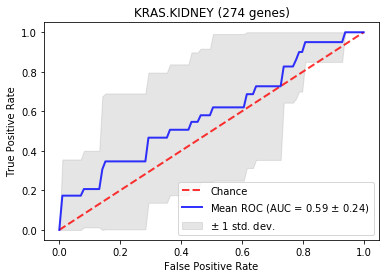

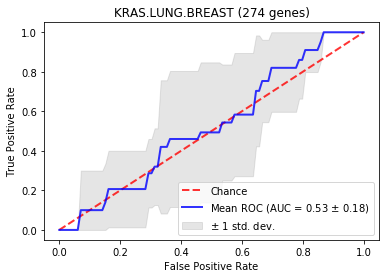

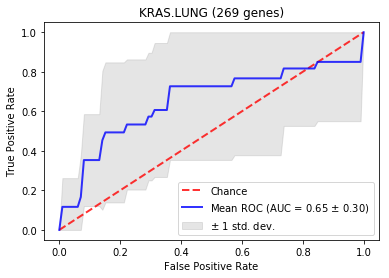

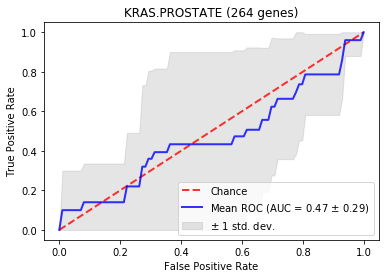

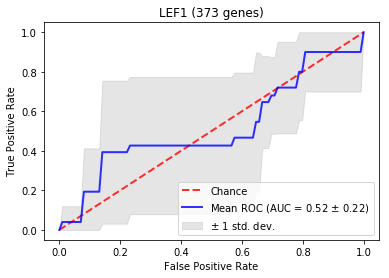

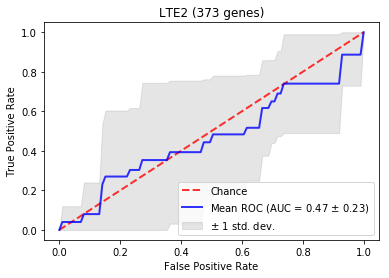

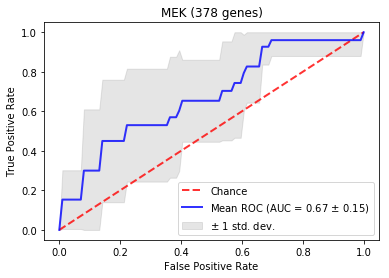

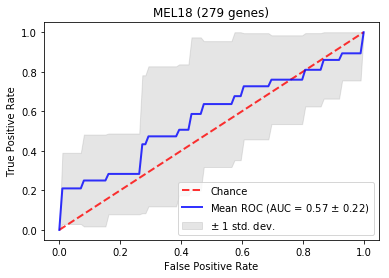

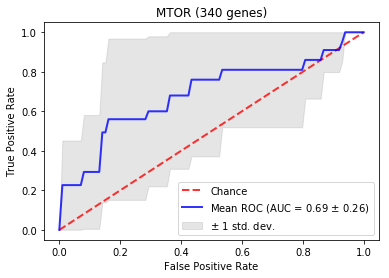

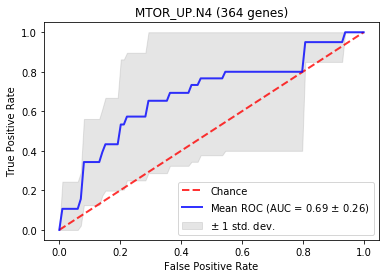

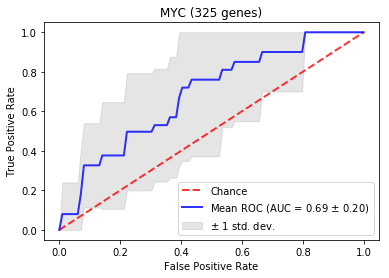

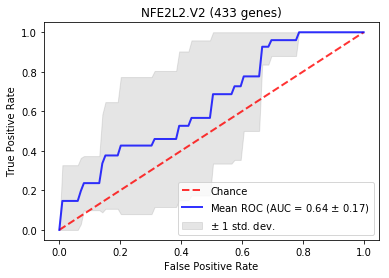

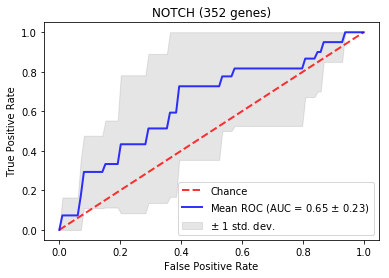

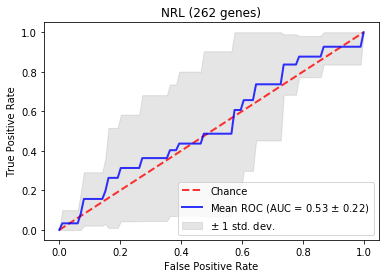

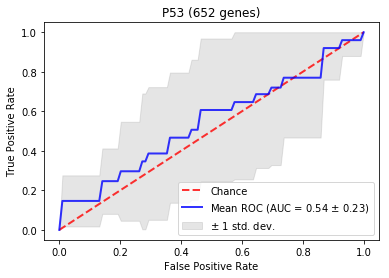

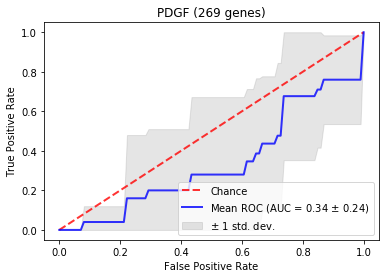

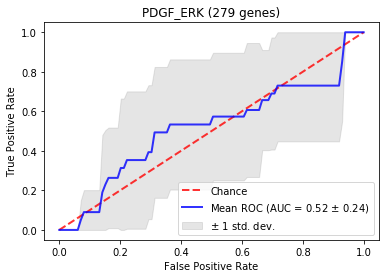

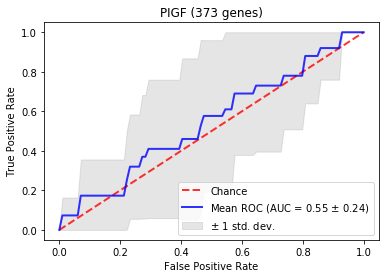

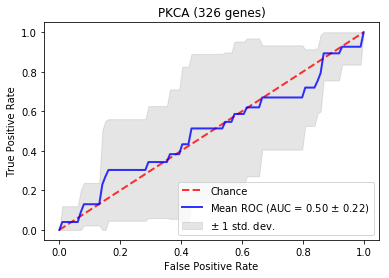

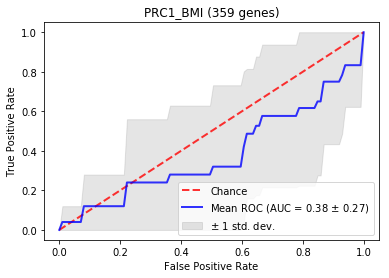

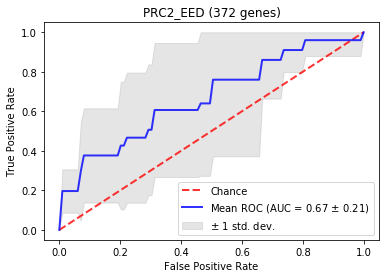

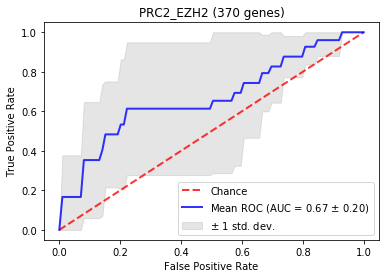

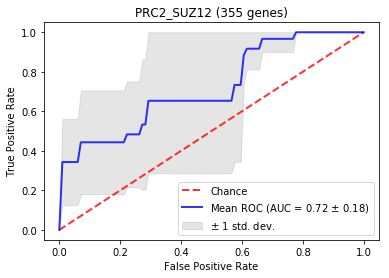

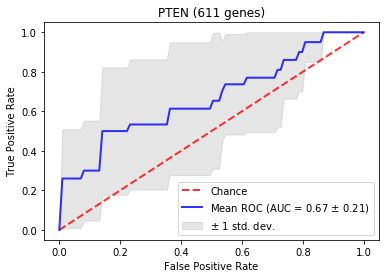

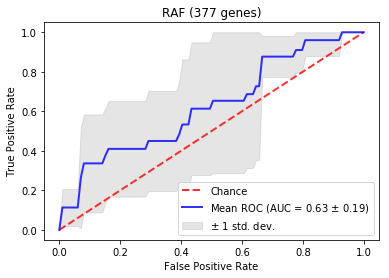

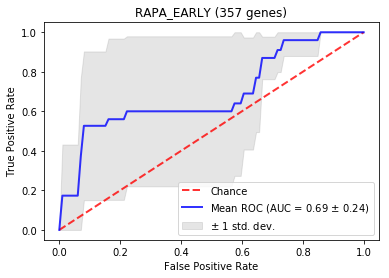

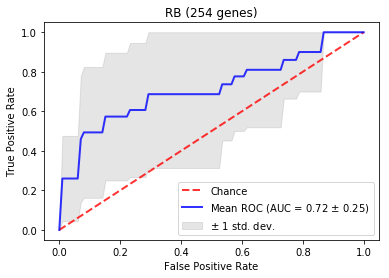

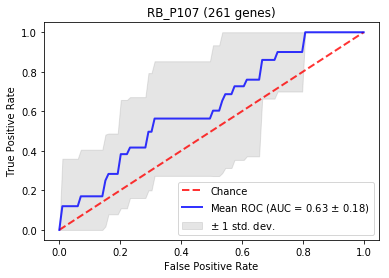

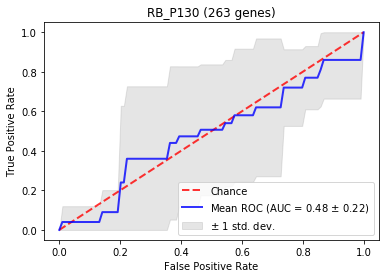

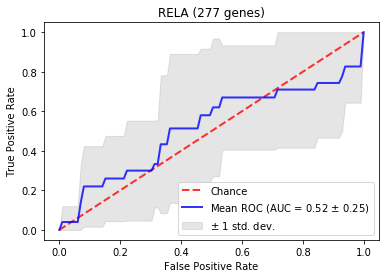

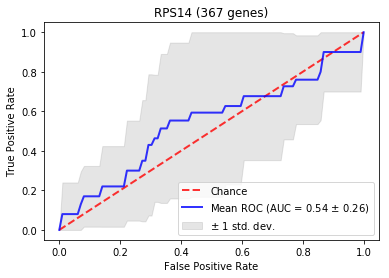

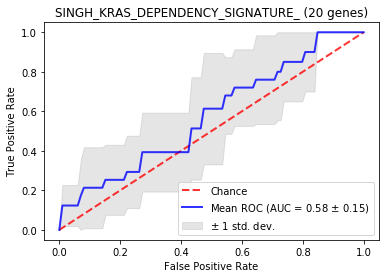

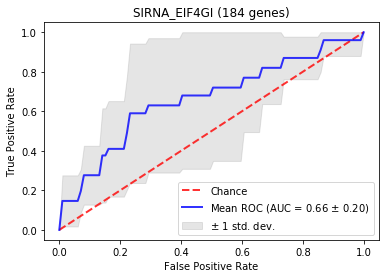

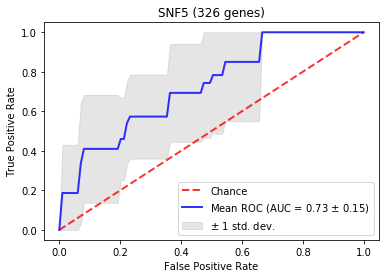

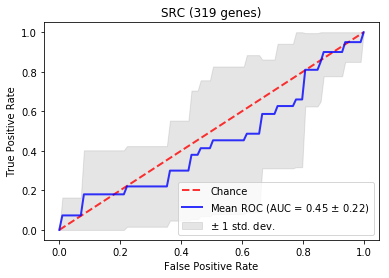

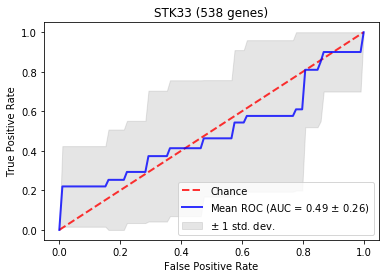

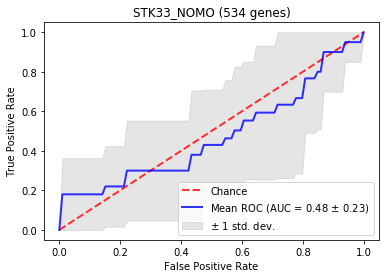

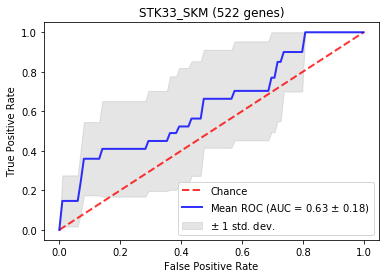

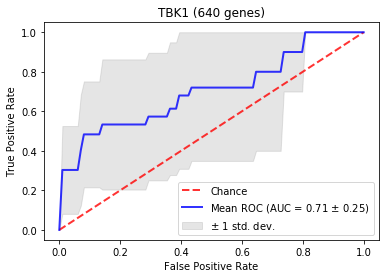

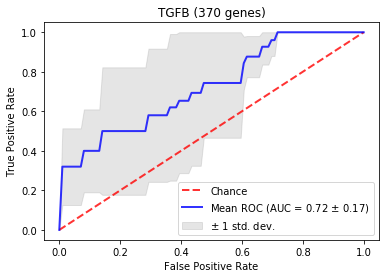

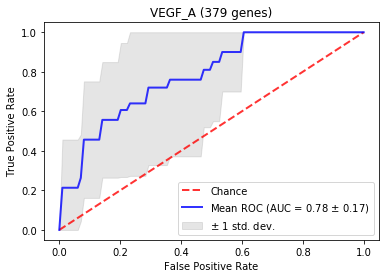

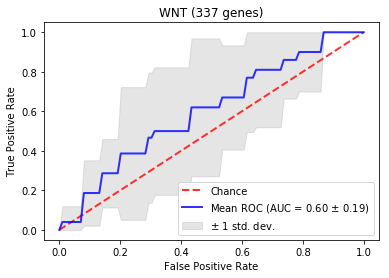

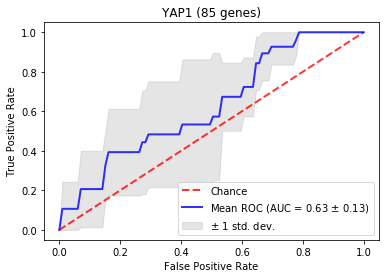

In [7]:
svm_perf = []
for p in pathways:
    clf = SVC(gamma='auto', probability=True)
    genes = dataset_utils.get_genes(p)
    name = "{} ({} genes)".format('.'.join(p.split('.')[:-1]), len(genes))
    mean_auc = plot_roc(clf, genes, name)
    svm_perf.append((name, mean_auc))

In [8]:
# get top 10 gene sets (by AUROC)
svm_perf.sort(key=lambda x: x[1], reverse=True)
for i in range(10):
    print("{}\t{}".format(svm_perf[i][1], svm_perf[i][0]))

0.7824579124579124	VEGF_A (379 genes)
0.7454208754208754	AKT (347 genes)
0.738956228956229	BCAT_BILD_ET_AL (91 genes)
0.7312121212121212	E2F1 (368 genes)
0.728047138047138	JAK2 (302 genes)
0.727070707070707	SNF5 (326 genes)
0.7225925925925925	TGFB (370 genes)
0.7200673400673401	PRC2_SUZ12 (355 genes)
0.7167003367003367	RB (254 genes)
0.7154545454545453	JNK (362 genes)


In [17]:
# get union of top K gene_sets
K = 3
top_union = dataset_utils.get_gene_sets_union(svm_perf, K)
print("Trastuzumab treatment: {} total genes in top {} gene sets".format(len(top_union), K))

Trastuzumab treatment: 799 total genes in top 3 gene sets


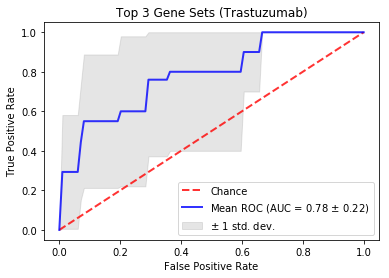

0.784074074074074

In [18]:
# SVM on only genes from top gene sets
top_genes = list(top_union)
clf = SVC(gamma='auto', probability=True)
plot_roc(clf, top_genes, "Top {} Gene Sets (Trastuzumab)".format(K))